# 4. EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from src.data_preparation import df_final

In [3]:
df_final = pd.read_csv('data/processed/df_final.csv')

In [4]:
df_final['From Bank'] = df_final['From Bank'].astype(str)
df_final['To Bank'] = df_final['To Bank'].astype(str)

In [5]:
def basic_checks(df):
    print('--------Info--------')
    print(df.info())
    print('--------Duplicates--------')
    print(df.loc[df.duplicated()])
    print('--------Unique values in categorical variables--------')
    for col in df.select_dtypes(include='object'):
        print(col, df[col].nunique())

basic_checks(df_final)

--------Info--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240940 entries, 0 to 12240939
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   From Bank           object 
 1   Account Number      object 
 2   To Bank             object 
 3   Amount Received     float64
 4   Receiving Currency  object 
 5   Amount Paid         float64
 6   Payment Currency    object 
 7   Payment Format      object 
 8   Is Laundering       int64  
 9   Bank Name           object 
 10  Entity ID           object 
 11  Entity Name         object 
 12  Timestamp_day       int64  
 13  Timestamp_weekday   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.3+ GB
None
--------Duplicates--------
         From Bank Account Number To Bank  Amount Received Receiving Currency  \
328927      221130      813df44b1     225         0.000001            bitcoin   
541929          10      802ab72f0      10        15.430000          us dollar   

In [6]:
df_final.head()

,From Bank,Account Number,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Bank Name,Entity ID,Entity Name,Timestamp_day,Timestamp_weekday
0,10,8000ebd30,10,3697.34,us dollar,3697.34,us dollar,reinvestment,0,national bank of laramie,800d232d0,partnership #1,1,3
1,3208,8000f5340,1,0.01,us dollar,0.01,us dollar,cheque,0,arbor savings bank,800aa5d20,corporation #1,1,3
2,3209,8000f4670,3209,14675.57,us dollar,14675.57,us dollar,reinvestment,0,national bank of fort wayne,800fbb3a0,partnership #3,1,3
3,12,8000f5030,12,2806.97,us dollar,2806.97,us dollar,reinvestment,0,national bank of the east,800c0ef20,sole proprietorship #1,1,3
4,10,8000f5200,10,36682.97,us dollar,36682.97,us dollar,reinvestment,0,national bank of laramie,800c3ec10,partnership #4,1,3


In [7]:
categorical_data = df_final.drop(columns=df_final.select_dtypes(include=["int64", "float64"]).columns)
categorical_data.describe(include='object').T

,count,unique,top,freq
From Bank,12240940,57222,70,1081591
Account Number,12240940,988911,10042b660,1553
To Bank,12240940,33608,11,81184
Receiving Currency,12240940,15,us dollar,4505900
Payment Currency,12240940,15,us dollar,4539364
Payment Format,12240940,7,cheque,4458178
Bank Name,12240940,20859,first bank of danbury,88276
Entity ID,12240940,361845,8015b10d0,111616
Entity Name,12240940,223926,partnership #953,111689


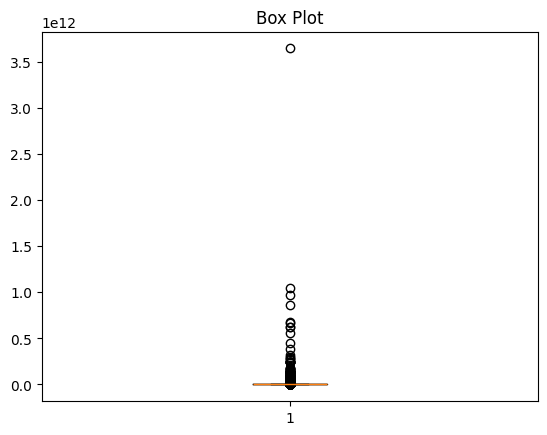

In [8]:
# Detect outliers in the transaction amount -> given that I am trying to detect for fraudulent spikes, suspicious account activity, unusual transaction,
# and those outliers might be a sign of thay, will not remove them. such patterns might be useful to train the models

def make_boxplot(df, col):
    plt.boxplot(df[col])
    plt.title('Box Plot')
    plt.show()


make_boxplot(df_final, 'Amount Paid')

In [9]:
numerical_data = df_final.drop(columns=df_final.select_dtypes(include=["object", "datetime"]).columns)

numerical_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Amount Received,12240940.0,6.126813e+06,1.718946e+09,0.000001,179.3,1409.14,12368.4725,3.644854e+12
Amount Paid,12240940.0,4.562318e+06,1.289584e+09,0.000001,180.5,1411.69,12301.0800,3.644854e+12
Is Laundering,12240940.0,7.267416e-04,2.694835e-02,0.000000,0.0,0.00,0.0000,1.000000e+00
Timestamp_day,12240940.0,4.843250e+00,3.075104e+00,1.000000,2.0,5.00,8.0000,1.800000e+01
Timestamp_weekday,12240940.0,2.993506e+00,1.517354e+00,0.000000,2.0,3.00,4.0000,6.000000e+00


In [10]:
print(numerical_data.var())
print('-----------------------')
print(numerical_data.skew())

Amount Received      2.954774e+18
Amount Paid          1.663026e+18
Is Laundering        7.262135e-04
Timestamp_day        9.456267e+00
Timestamp_weekday    2.302364e+00
dtype: float64
-----------------------
Amount Received      1645.021368
Amount Paid          2013.687511
Is Laundering          37.054096
Timestamp_day           0.097509
Timestamp_weekday      -0.383620
dtype: float64


In [11]:
numerical_data.skew()


Amount Received      1645.021368
Amount Paid          2013.687511
Is Laundering          37.054096
Timestamp_day           0.097509
Timestamp_weekday      -0.383620
dtype: float64

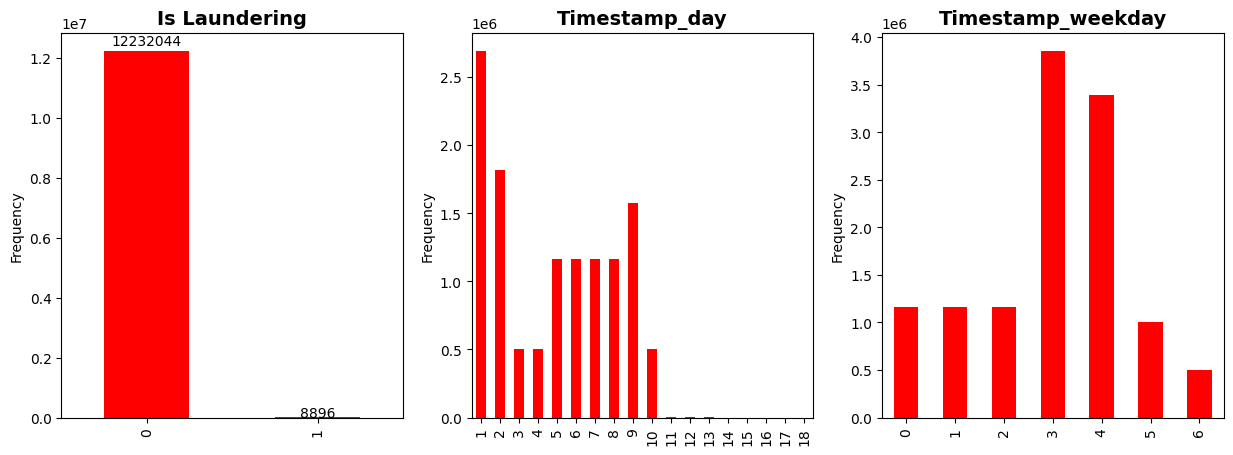

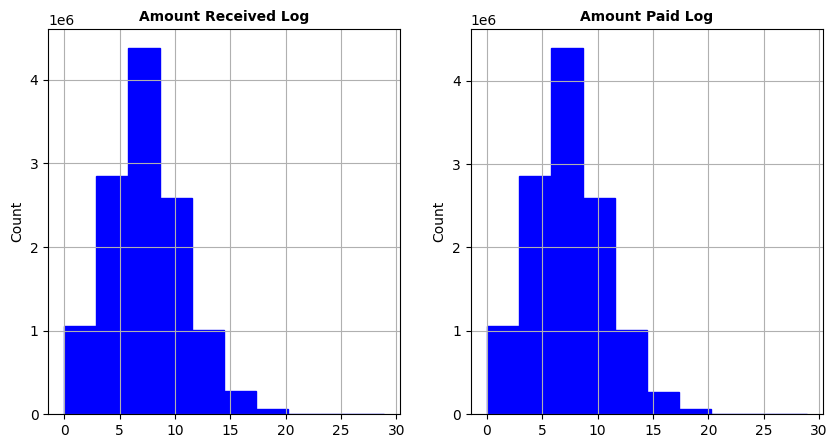

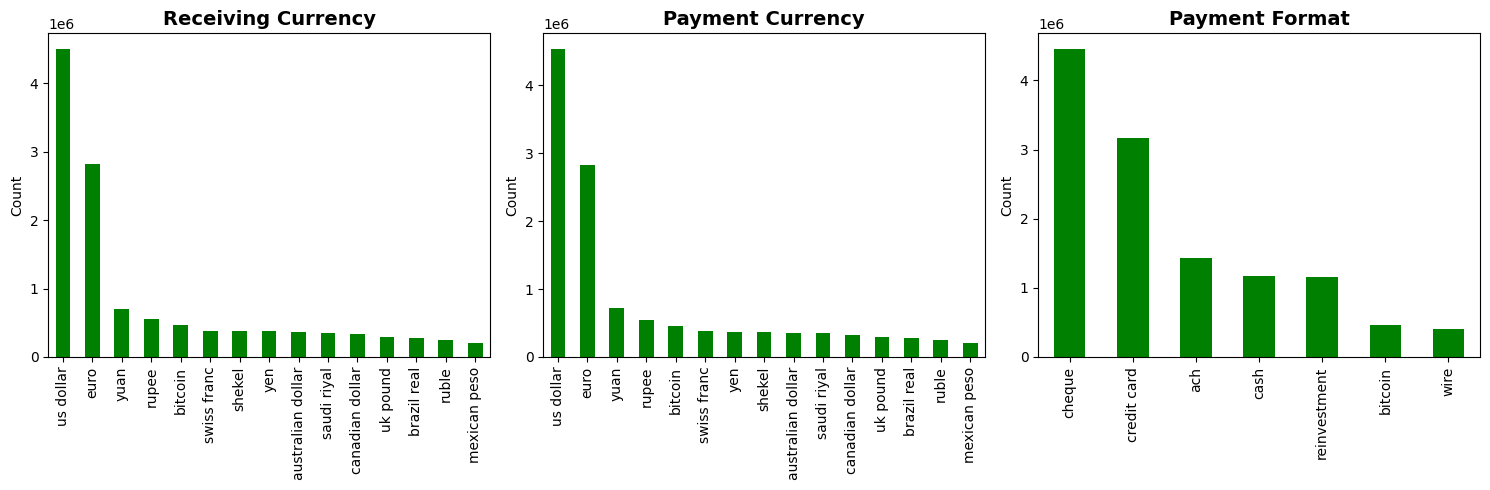

In [29]:
import numpy as np
import matplotlib.pyplot as plt

cols = ['Is Laundering', 'Timestamp_day', 'Timestamp_weekday']
fig, axes = plt.subplots(1, len(cols), figsize=(5*len(cols), 5))

for ax, col in zip(axes, cols):
    counts = numerical_data[col].value_counts().sort_index()
    if col == 'Is Laundering':
        for idx, val in enumerate(counts):
            ax.text(idx, 1.015*val, str(val), ha='center', fontsize=10)
    counts.plot(kind='bar', ax=ax, color='red')
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')


# NUMERICAL
#  has there very high positive skew ranges (typical in financial data) - we do a log transformation
numerical_data['Amount Received Log'] = np.log1p(numerical_data['Amount Received'])  # log(1 + x) to handle zeros
numerical_data['Amount Paid Log'] = np.log1p(numerical_data['Amount Paid'])  # log(1 + x) to handle zeros

cols = ['Amount Received Log','Amount Paid Log']
fig, axes = plt.subplots(1, len(cols), figsize=(5*len(cols), 5))

for ax, col in zip(axes, cols):
    numerical_data[col].hist(ax=ax, color='blue', edgecolor='blue')
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# CATEGORICAL
cols = ['Receiving Currency', 'Payment Currency', 'Payment Format']
fig, axes = plt.subplots(1, len(cols), figsize=(5*len(cols), 5))  # width scales with number of plots

for ax, col in zip(axes, cols):
    counts = categorical_data[col].value_counts()
    counts.plot(kind='bar', rot=90, ax=ax, color='green')
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count')


plt.tight_layout()
plt.show()

In [ ]:
# Variables Distribution

# Numerical: both right-skewed -> most transactions are relatively small, but there are a few extremely large transactions causing the long right tail.
# Binary: imbalanced
# Categorical: skewed category distribution(a few tall bars with many tiny bars)

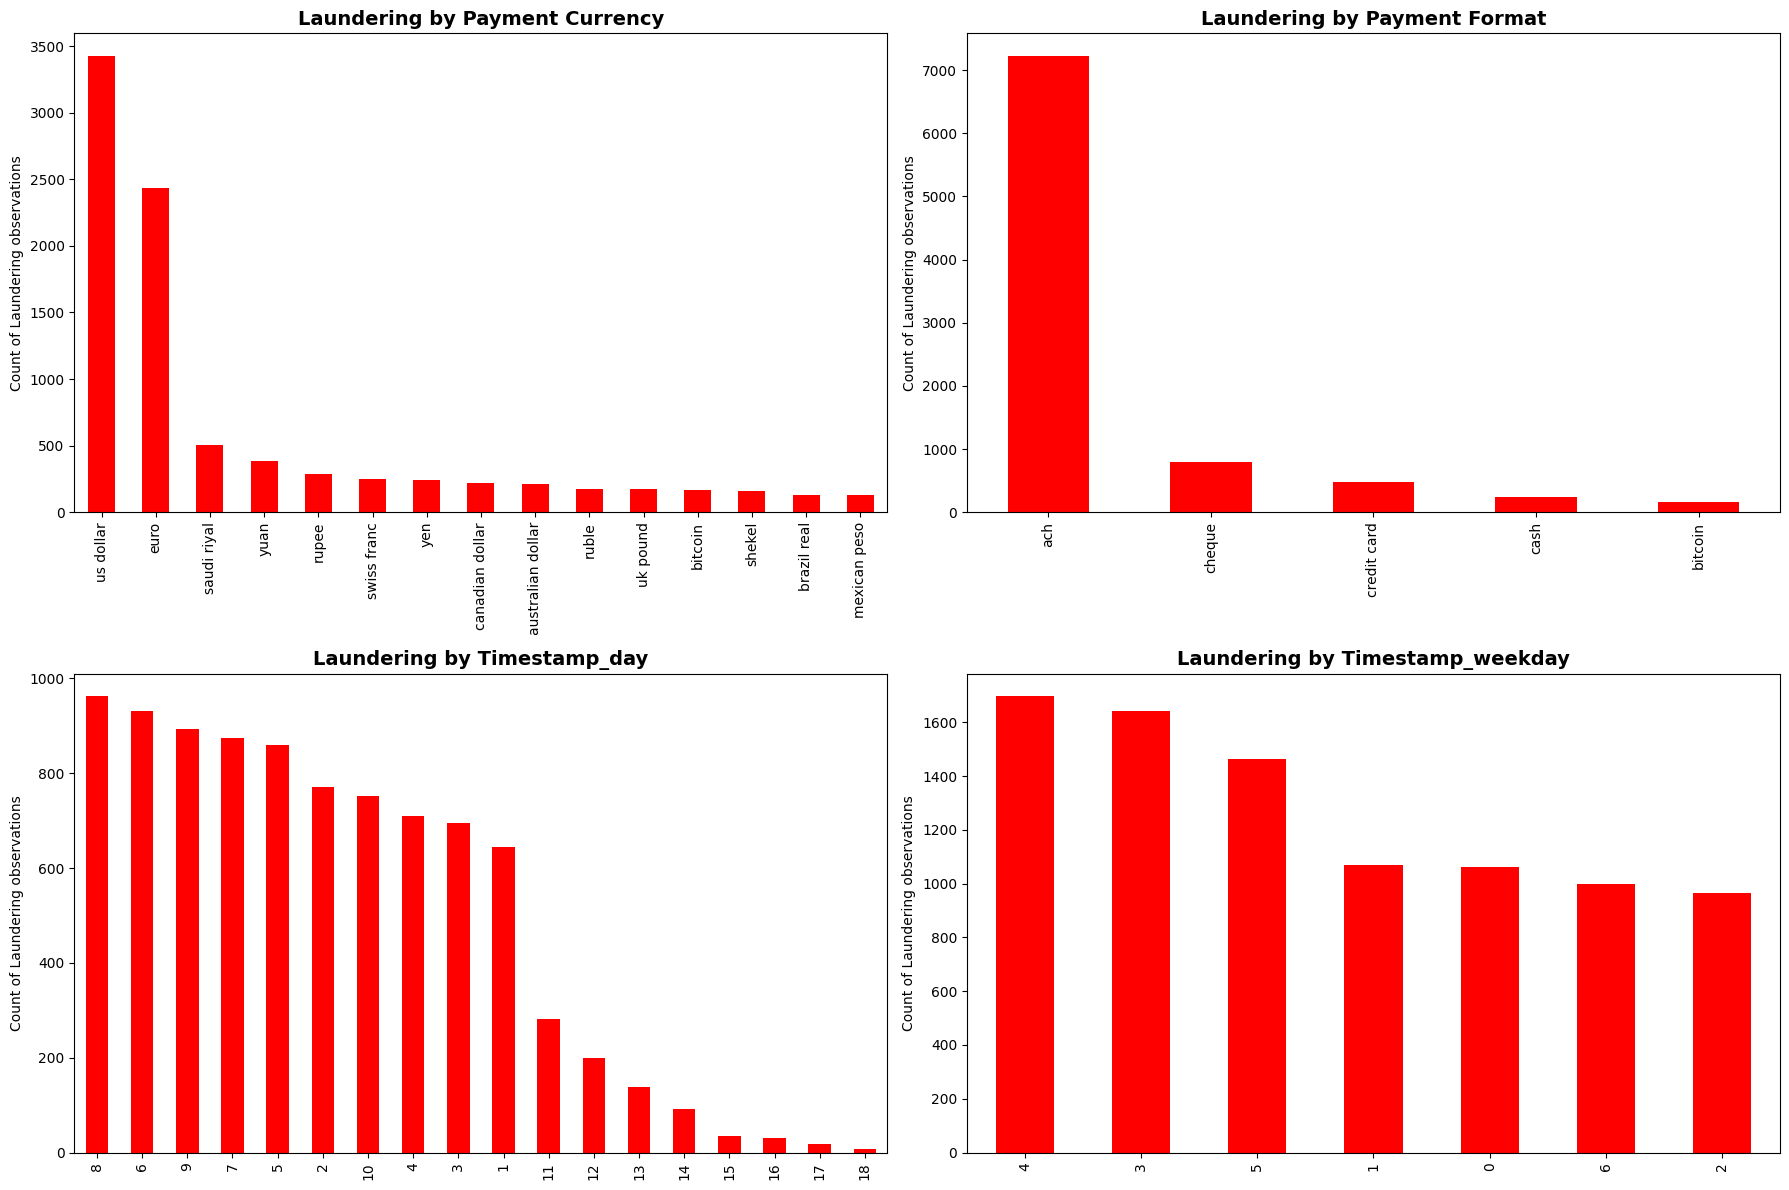

In [21]:
import matplotlib.pyplot as plt

# Filter data for laundering
df_laundering = df_final[df_final['Is Laundering'] == 1]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

cols = ['Payment Currency', 'Payment Format', 'Timestamp_day', 'Timestamp_weekday']

for idx, col in enumerate(cols):
    if col != 'Entity Name':
        counts = df_laundering[col].value_counts()
    else:
        counts = df_laundering[col].value_counts().head(25)

    counts.plot(kind='bar', color='red', ax=axes[idx])
    axes[idx].set_title(f'Laundering by {col}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Count of Laundering observations')
    axes[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Filter Methods for Feature Importance

<Axes: >

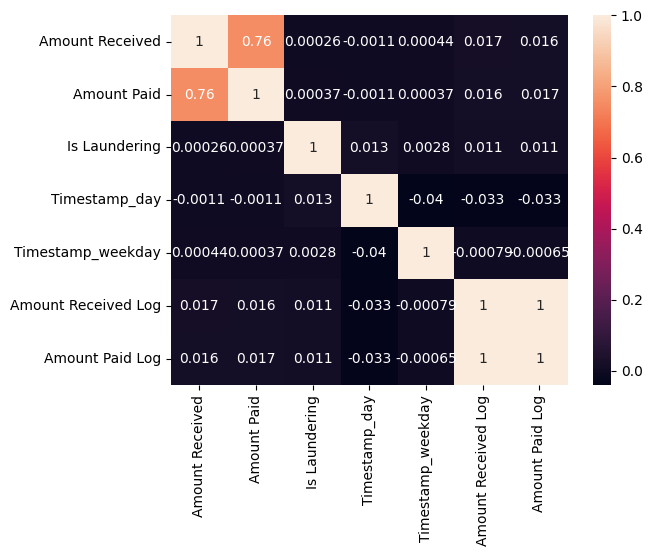

In [30]:
import seaborn as sb

# pearson (linear relationship between vars - assumes normal distribution, sensitive to outliers)
# spearman (for vars with a natural order, can rank them, monotonic relationship - good for ordinal relationships, robust outliers)
# kendall (small samples)

corr = numerical_data.corr(method='pearson')
sb.heatmap(corr, annot=True)

In [31]:
# Chi-square test: to measure dependence between categorical features & categorical target

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest

X = df_final.drop(columns=df_final.select_dtypes(include=["int64", "float64"]).columns)
target = df_final['Is Laundering']

# Label encode categorical features (Chi-square needs integer encoding, not one-hot)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Perform Chi-square test
chi_scores, p_values = chi2(X_encoded, target)

# Put results in DataFrame
results = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(results)


              Feature    Chi2 Score   p-value
1      Account Number  2.394794e+08  0.000000
7           Entity ID  6.762787e+06  0.000000
8         Entity Name  3.596330e+06  0.000000
0           From Bank  3.301777e+06  0.000000
2             To Bank  4.448927e+05  0.000000
6           Bank Name  1.023392e+05  0.000000
5      Payment Format  1.799941e+04  0.000000
3  Receiving Currency  8.093683e-01  0.368307
4    Payment Currency  3.859075e-03  0.950466


In [32]:
# Mutual information: nonlinear dependency between features and target

from sklearn.feature_selection import mutual_info_classif


X = df_final.drop(columns='Is Laundering').copy()
y = df_final['Is Laundering']

# Encode categorical columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Now compute MI
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi_series)

Timestamp_day         0.203747
Timestamp_weekday     0.144697
Payment Format        0.023811
From Bank             0.022156
Receiving Currency    0.020390
Payment Currency      0.018370
Bank Name             0.003195
Entity ID             0.001396
Entity Name           0.001269
To Bank               0.001056
Account Number        0.000828
Amount Paid           0.000278
Amount Received       0.000270
dtype: float64
